###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2016 A.A. Kulkarni

## "We need to be appreciated more than ever" - PDE's

   Some may say our prevalence and importance is only to the world of engineering and physics. But have you lately checked out the advances in [biology](https://www.birs.ca/workshops/2015/15w5072/report15w5072.pdf), [economics](http://www.princeton.edu/~moll/PDE_macro.pdf) and real-time stock trading?
<img style="float: right;" src="tumblr_why.jpg" width="350" height="300" >

Engineers working on a new Bentley, analysts crunching numbers at the New York stock exchange to scientists studying motion of miniscule droplets on a leaf to the formation of gigantic galaxies all rely on PDE's. 

Credit to Dr Barba and her group, we have had fun with some interesting ordinary and partial differential equations. Right from Module 1 the wheels in our head are turning, and to keep up with that, I asked myself a question, 







#### *** Is there a equation which is at the forefront of not one but many distinct fields? ***

## Hello Fisher Kolmogorov equation!

A non-linear reaction-diffusion equation by nature, its use can be seen from the fields of ecology, combustion, crystallization, plasma and adavantageous gene travel [1].
$$ \frac {\partial u}{\partial t} - D \frac{\partial^2 u}{\partial^2 x} = f(u)$$
Let's take a look at what the equation is built up of,

1. It's a 2nd order in space
2. It's a 1st order in time
3. Composed of one non-linear term


#### First lets import the libraries

In [1]:
import numpy
from matplotlib import pyplot
import math
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] =16

from matplotlib import animation
from IPython.display import HTML

$$ u_t =u_{xx} + 6u(1-u)$$  
** Lets look at the initial and boundary conditions, **

$$ u_o(x)  = \frac{1}{2} \tanh(x) + \frac{1}{2}$$

$$ u(x,0) = u_o$$

** and the boundary condition is **

$$ \frac {\partial{u}}{ \partial{n}} = 0 $$

** Thus the discretized equation becomes,**
$$ \frac{u_i^{n+1} - u_i^{n}}{\Delta t} = \frac{u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^n}{\Delta x^2} + \alpha u_i^n(1-u_i^n)$$

So now we already have one inital condition, thus the only unknown is $u_i^{n+1} $ and re-arranging the above equation to get this term on the LHS, we get

$$ u_i^{n+1} = \frac{\Delta t }{\Delta x^2} (u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^n) + \Delta t \alpha u_i^n(1-u_i^n) +u_i^n$$ 

In [2]:
nx =101
dx =0.1
dt =0.001
nt = [100,250,500,1000,1250,2000]
x = numpy.linspace(-10,10,nx)
D =1
alpha = 6

u = numpy.zeros(nx)
u = 1/2 * numpy.tanh(x) + 1/2               #Initial waveform

In [3]:
def CatchtheFisherwave(u,nt,dt,dx):
    
    """Solve the linear convection equation.
    
    Solves the equation d_t u + c d_x u = 0 where 
    * the diffusion constant is set to 1
    * the domain is x \in [0, 10]
    * 20 timesteps are taken, with \Delta t = 0.1
    * the initial data is described in above
    
    Parameters
    ----------
    u  : Initial waveform
    nx : integer
        number of internal grid points
    dt : difference in each timestep
    dx :
        
    Returns
    -------
    
    
    """
    
    un= numpy.zeros_like(u)
    u = 1/2 * numpy.tanh(x) + 1/2
    for n in range (nt):
        un= numpy.copy(u)
        u[1:-1] = un[1:-1] \
                + D * dt/dx**2 * (un[2:] - 2*un[1:-1] + un[0:-2]) \
                + alpha * un[1:-1] * dt * (1 - un[1:-1])
                
        u[0] = u[1] 
        u[-1] = u[-2]
        
    return u

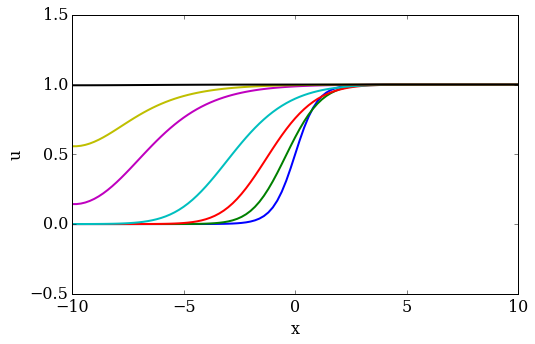

In [4]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.ylim(-0.5,1.5)
pyplot.ylabel('u')
pyplot.xlabel('x')
pyplot.plot(x,u,lw=2)
for n in nt:
    u = CatchtheFisherwave(u,n,dt,dx)
    pyplot.plot(x,u,lw=2)

In [5]:
%%capture
%run Animate_func.py

In [6]:
HTML(anim.to_html5_video())

## References: ##

1. https://en.wikipedia.org/wiki/Fisher's_equation



###### Cell below loads the style for the notebook

In [7]:
from IPython.core.display import HTML
css_file = 'style_kulkarni2.css'
HTML(open(css_file, "r").read())